In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
df = pd.read_csv("./water_potability.csv")

In [3]:
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
np.shape(df)

(104832, 10)

In [5]:
print("Number of null values in different columns")
print(df.isna().sum())

Number of null values in different columns
ph                 15712
Hardness               0
Solids                 0
Chloramines            0
Sulfate            24992
Conductivity           0
Organic_carbon         0
Trihalomethanes     5184
Turbidity              0
Potability             0
dtype: int64


In [6]:
# df=df.dropna()

In [7]:
df.loc[(df['ph'].isna() == True), 'ph'] = df['ph'].mean()
df.loc[(df['Sulfate'].isna() == True), 'Sulfate'] = df['Sulfate'].mean()
df.loc[(df['Trihalomethanes'].isna() == True), 'Trihalomethanes'] = df['Trihalomethanes'].mean()

In [8]:
np.shape(df)

(104832, 10)

In [9]:
print("Number of null values after dropping null values")
print(df.isna().sum())

Number of null values after dropping null values
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000,104832.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469739,32.874900,8767.274237,1.582851,36.137268,80.812113,3.307673,15.767549,0.780267,0.487777
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [11]:
df.reset_index(inplace=True)
df=df.drop(['index'],axis=1)

In [12]:
df.groupby("Potability").count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,63936,63936,63936,63936,63936,63936,63936,63936,63936
1,40896,40896,40896,40896,40896,40896,40896,40896,40896


In [13]:
y = df['Potability']
X = df.drop(['Potability'],axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [18]:
print('Size Training Set: {}'.format(len(X_train)))
print('Size Testing Set: {}'.format(len(X_test)))

Size Training Set: 94348
Size Testing Set: 10484


In [19]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",mode = 'auto',patience=15)

In [21]:
#test 1

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='relu'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

# history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])
history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 94348 samples, validate on 10484 samples
Epoch 1/400
94348/94348 [==============================] - 7s 75us/sample - loss: 0.2361 - acc: 0.6190 - val_loss: 0.2314 - val_acc: 0.6338
Epoch 2/400
94348/94348 [==============================] - 6s 61us/sample - loss: 0.2230 - acc: 0.6505 - val_loss: 0.2199 - val_acc: 0.6586
Epoch 3/400
94348/94348 [==============================] - 7s 78us/sample - loss: 0.2163 - acc: 0.6651 - val_loss: 0.2130 - val_acc: 0.6704
Epoch 4/400
94348/94348 [==============================] - 7s 78us/sample - loss: 0.2123 - acc: 0.6734 - val_loss: 0.2108 - val_acc: 0.6746
Epoch 5/400
94348/94348 [==============================] - 7s 77us/sample - loss: 0.2098 - acc: 0.6781 - val_loss: 0.2117 - val_acc: 0.6784
Epoch 6/400
94348/94348 [==============================] - 6s 69us/sample - loss: 0.2080 - acc: 0.6820 - val_loss: 0.2070 - val_acc:

In [22]:
#test 2

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='softmax'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

# history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])
history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test))


Train on 94348 samples, validate on 10484 samples
Epoch 1/400
94348/94348 [==============================] - 7s 75us/sample - loss: 0.2392 - acc: 0.6093 - val_loss: 0.2366 - val_acc: 0.6151
Epoch 2/400
94348/94348 [==============================] - 5s 56us/sample - loss: 0.2381 - acc: 0.6093 - val_loss: 0.2367 - val_acc: 0.6151
Epoch 3/400
94348/94348 [==============================] - 7s 71us/sample - loss: 0.2377 - acc: 0.6091 - val_loss: 0.2355 - val_acc: 0.6151
Epoch 4/400
94348/94348 [==============================] - 7s 69us/sample - loss: 0.2372 - acc: 0.6114 - val_loss: 0.2354 - val_acc: 0.6167
Epoch 5/400
94348/94348 [==============================] - 6s 64us/sample - loss: 0.2367 - acc: 0.6141 - val_loss: 0.2345 - val_acc: 0.6227
Epoch 6/400
94348/94348 [==============================] - 7s 72us/sample - loss: 0.2353 - acc: 0.6202 - val_loss: 0.2326 - val_acc: 0.6222
Epoch 7/400
94348/94348 [==============================] - 7s 69us/sample - loss: 0.2311 - acc: 0.6331 - val_l

In [23]:
#test 3

model = keras.Sequential()
model.add(layers.Dense(20,input_dim=9, activation='selu'))
model.add(layers.Dense(16))
model.add(layers.Dense(15))
model.add(layers.Dense(10))
model.add(layers.Dense(5))
model.add(layers.Dense(1))

opt = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

# history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test),callbacks=[early_stopping])
history = model.fit(X_train, y_train, batch_size=75, epochs=400, validation_data=(X_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 94348 samples, validate on 10484 samples
Epoch 1/400
94348/94348 [==============================] - 7s 76us/sample - loss: 0.2403 - acc: 0.6089 - val_loss: 0.2374 - val_acc: 0.6188
Epoch 2/400
94348/94348 [==============================] - 8s 81us/sample - loss: 0.2379 - acc: 0.6110 - val_loss: 0.2366 - val_acc: 0.6162
Epoch 3/400
94348/94348 [==============================] - 7s 78us/sample - loss: 0.2373 - acc: 0.6117 - val_loss: 0.2368 - val_acc: 0.6151
Epoch 4/400
94348/94348 [==============================] - 7s 78us/sample - loss: 0.2370 - acc: 0.6127 - val_loss: 0.2379 - val_acc: 0.6251
Epoch 5/400
94348/94348 [==============================] - 7s 77us/sample - loss: 0.2351 - acc: 0.6177 - val_loss: 0.2345 - val_acc: 0.6287
Epoch 6/400
94348/94348 [==============================] - 7s 77us/sample - loss: 0.2246 - acc: 0.6481 - val_loss: 0.2197 - val_acc: 0.6648
Epoch 7/400
9434

In [24]:
import matplotlib.pyplot as plt

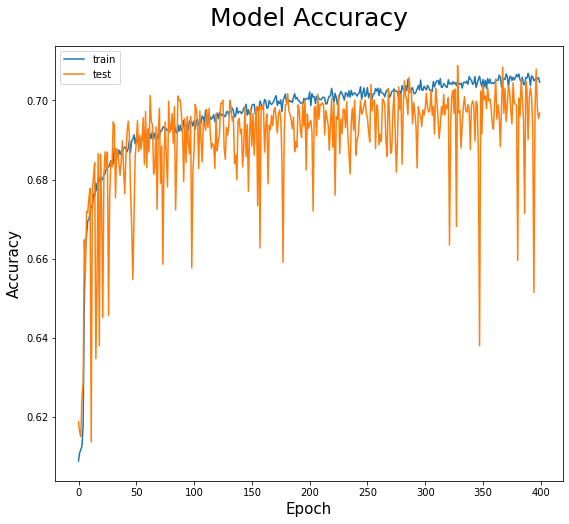

In [25]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

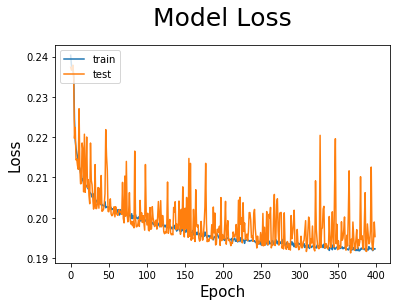

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

In [27]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [28]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

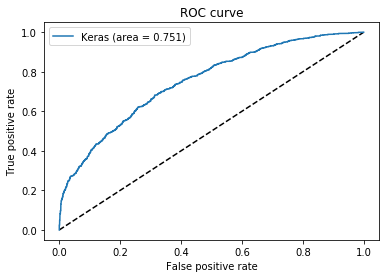

In [29]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [30]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [32]:
import seaborn as sns


Text(0.5, 15.0, 'Predicted label')

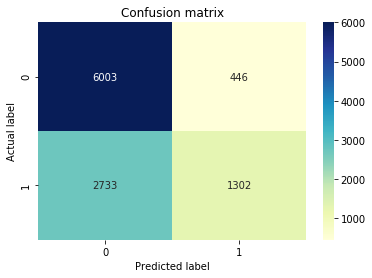

In [33]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')